## A basic set of tools for visualizing FESOM2.0 simulations

In [19]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
## import standard python packages

In [21]:
# import standard python packages
import sys
import numpy as np
# import basemap
from mpl_toolkits.basemap import Basemap
# import FESOM packages
sys.path.append("./modules/")
from load_mesh_data import *
from regriding import fesom2clim
sys.path.append("/home/h/hbkdsido/utils/seawater-1.1/")
import seawater as sw
from fesom_plot_tools import *
import cmocean.cm as cmo
import matplotlib 
fontsize=20
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize) 

## read the mesh

In [22]:
# set the path to the mesh
#meshpath  ='/home/ollie/nkolduno/meshes/pi-grid/'
meshpath  ='/work/ollie/pscholz/mesh_fesom2.0/mesh_CORE2_finaltopo_mean/'
#meshpath  ='/work/ollie/ogurses/NATMAP/mesh_F2GLO08/'
alpha, beta, gamma=[50, 15, -90]
#alpha, beta, gamma=[0, 0, 0]
try:
	mesh
except NameError:
	print("mesh will be loaded")
	mesh=load_mesh(meshpath, abg=[alpha, beta, gamma], usepickle = False)
else:
	print("mesh with this name already exists and will not be loaded")

mesh with this name already exists and will not be loaded


## Example 1
### plot the 2D slice of data at depth

ftriplot, number of dummy points: 60262


/home/ollie/nkolduno/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1800: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
./modules/fesom_plot_tools.py:62: RuntimeWarning: invalid value encountered in less_equal
  data2[data2<=contours.min()]=contours.min()+eps
./modules/fesom_plot_tools.py:63: RuntimeWarning: invalid value encountered in greater_equal
  data2[data2>=contours.max()]=contours.max()-eps


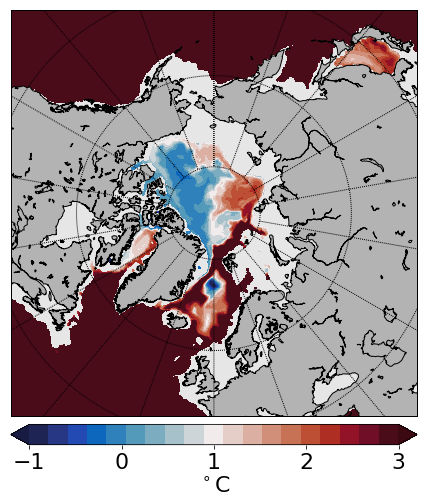

In [6]:
# set the paths to the results, runid, etc.
result_path ='/work/ollie/dsidoren/results/run_CORE2noGMSWHO_topo/'
runid ='fesom'
str_id='temp'

# specify depth, records and year to read
depth, records, year=300, np.linspace(0,0,1).astype(int), 1959

# set the label for the colorbar & contour intervals for ftriplot
cbartext, cont = '$^\circ$C', [-1., 3., .1]

# get the closest model depth to the desired one
ilev=ind_for_depth(depth, mesh)

# read the model result from str_id.XXXX.nc
data=read_fesom_slice(str_id, records, year, mesh, result_path, runid, ilev=ilev)

# choose the colorbar and plot the data
cmap=cmo.balance
fig =plt.figure(figsize=(12,8))

# ftriplot is defined in fesom_plot_tools.py
data[data==0]=np.nan
[im, map, cbar]=ftriplot(mesh, data, np.linspace(cont[0], cont[1], 20), oce='np', cmap=cmap)
cbar.set_label(cbartext, fontsize=22)
cbar.set_ticks([round(i,7) for i in np.linspace(cont[0], cont[1], 5)])
cbar.ax.tick_params(labelsize=22)

## Example 2
### comparing to climatology

./modules/climatology.py:83: RuntimeWarning: invalid value encountered in greater
  self.T = np.copy(ncfile.variables['temp'][:,:,:])
./modules/climatology.py:92: RuntimeWarning: invalid value encountered in greater
  self.S=np.copy(ncfile.variables['salt'][:,:,:])
/home/ollie/nkolduno/miniconda2/envs/py35/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/ollie/nkolduno/miniconda2/envs/py35/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


the model depth is:  1000 ; the closest depth in climatology is:  1000.0


./modules/fesom_plot_tools.py:99: RuntimeWarning: invalid value encountered in less_equal
  zz[zz<=contours.min()]=contours.min()+eps
./modules/fesom_plot_tools.py:100: RuntimeWarning: invalid value encountered in greater_equal
  zz[zz>=contours.max()]=contours.max()-eps
/home/ollie/nkolduno/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1800: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


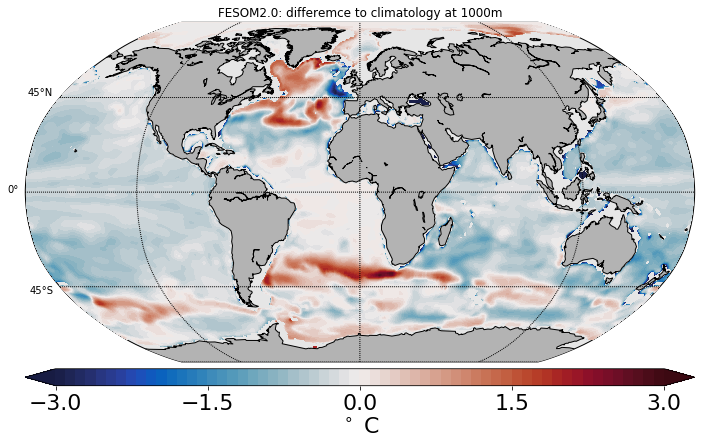

In [7]:
# read the climatology
from climatology import *
phc=climatology('phc3/', climname='phc')

# set the paths to the results, runid, etc.
result_path ='/work/ollie/dsidoren/results/run_CORE2noGMSWHO_topo/'
runid ='fesom'
str_id='temp'

# specify depth, records and year to read
depth, records, year=1000, np.linspace(0,0,1).astype(int), 1959

# set the label for the colorbar & contour intervals for ftriplot
cbartext, cont = '$^\circ$C', [-3., 3., .1]

# get the closest model depth to the desired one
ilev=ind_for_depth(depth, mesh)

# read the model result from str_id.XXXX.nc
data=read_fesom_slice(str_id, records, year, mesh, result_path, runid, ilev=ilev)

# interpolate the data onto the climatology grig
[iz, xx, yy, zz]=fesom2clim(data, depth, mesh, phc, radius_of_influence=10000000)

# plot the difference to climatology
cbartext=('$^\circ$ C' if (str_id=='temp') else 'psu')

# compute the difference to climatology (only T & S are supported)
dd=zz[:,:]-(phc.T[iz,:,:] if (str_id=='temp') else phc.S[iz,:,:])

# choose the colorbar and plot the data
cmap=cmo.balance

# wplot_xy is defined in fesom_plot_tools.py
fig = plt.figure(figsize=(12,8))
[im, map, cbar]=wplot_xy(xx,yy,dd,np.arange(cont[0], cont[1]+cont[2], cont[2]), cmap=cmap, do_cbar=True)
cbar.set_label(cbartext, fontsize=22)
cbar.set_ticks([round(i,4) for i in np.linspace(cont[0], cont[1], 5)])
cbar.ax.tick_params(labelsize=22)
plt.title('FESOM2.0: differemce to climatology at ' + np.str(depth)+'m')

## Example 3
### plot the norm of velocity (given on elements)

In [11]:
from numba import jit
@jit("float64[:](float64[:],int64, float64[:], int64[:,:], int64, float64[:])", nopython=True)
def tonodes(component, n2d, voltri, elem, e2d, lump2):
    ''' Function to interpolate from elements to nodes.
    Made fast with numba.
    '''
    onnodes=np.zeros(shape=n2d)

    var_elem=component*voltri
    for i in range(e2d):
        onnodes[elem[i,:]]=onnodes[elem[i,:]]+np.array([var_elem[i], var_elem[i], var_elem[i]])
    onnodes=onnodes/lump2/3.
    return onnodes

ftriplot, number of dummy points: 36210


./modules/fesom_plot_tools.py:34: RuntimeWarning: invalid value encountered in less_equal
  data2[data2<=contours.min()]=contours.min()+eps
./modules/fesom_plot_tools.py:35: RuntimeWarning: invalid value encountered in greater_equal
  data2[data2>=contours.max()]=contours.max()-eps


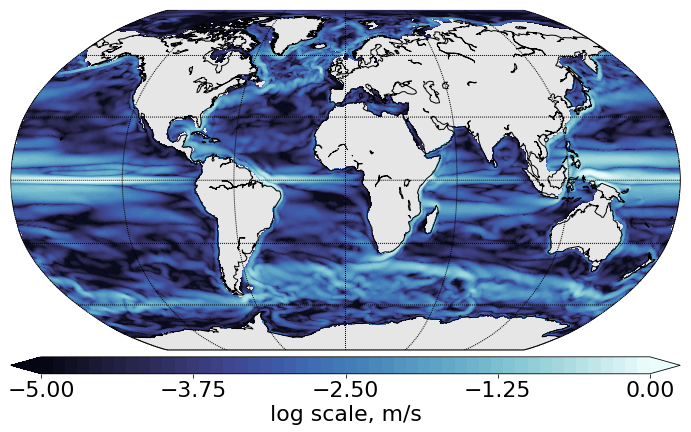

In [12]:
# set the paths to the results, runid, etc.
result_path ='/work/ollie/dsidoren/results/run_CORE2noGMSWHO_topo/'
runid ='fesom'

# specify depth, records and year to read
depth, records, year=100, np.linspace(0,0,1).astype(int), 1959

# set the label for the colorbar & contour intervals for ftriplot
cbartext, cont = 'log scale, m/s', [-5.,0., 0.1]

# get the closest model depth to the desired one
ilev=ind_for_depth(depth, mesh)

# read the ocean velocities
u=read_fesom_slice('u', records, year, mesh, result_path, runid, ilev=ilev)
v=read_fesom_slice('v', records, year, mesh, result_path, runid, ilev=ilev)
# one could use Dataset instead:
# f=Dataset('../results/run_8km_noGMHO/fesom.1960.oce.restart.nc')
# u=f.variables['u'][0,:,11]
# v=f.variables['v'][0,:,11]

# velocities on elements will be interpolated onto nodes
# allocate the nodal fields
unodes=np.zeros(shape=mesh.n2d)
vnodes=np.zeros(shape=mesh.n2d)

#  old and slow way to interpolate original velocities onto nods (unodes, vnodes)
# var_elem=u*mesh.voltri
# for i in range(mesh.e2d):
#     unodes[mesh.elem[i,:]]=unodes[mesh.elem[i,:]]+[var_elem[i], var_elem[i], var_elem[i]]
# unodes=unodes/mesh.lump2/3.

# var_elem=v*mesh.voltri
# for i in range(mesh.e2d):
#     vnodes[mesh.elem[i,:]]=vnodes[mesh.elem[i,:]]+[var_elem[i], var_elem[i], var_elem[i]]
# vnodes=vnodes/mesh.lump2/3.

#  new and fast way to interpolate original velocities onto nods (unodes, vnodes). Require numba. 
unodes = tonodes(u, mesh.n2d, mesh.voltri, mesh.elem, mesh.e2d, mesh.lump2)
vnodes = tonodes(v, mesh.n2d, mesh.voltri, mesh.elem, mesh.e2d, mesh.lump2)

# compute the absolute velocity
data=np.hypot(unodes, vnodes)

# plot the result
cmap=cmo.ice
fig = plt.figure(figsize=(12,8))
# ftriplot is defined in fesom_plot_tools.py
data[data==0]=np.nan
[im, map, cbar]=ftriplot(mesh, np.log(data), np.arange(cont[0], cont[1]+cont[2], cont[2]), oce='global', cmap=cmap)
cbar.set_label(cbartext, fontsize=22)
cbar.set_ticks([round(i,4) for i in np.linspace(cont[0], cont[1], 5)])
cbar.ax.tick_params(labelsize=22)

## Example 4
### plot a section

/home/ollie/nkolduno/miniconda2/envs/py35/lib/python3.5/site-packages/pyresample/kd_tree.py:383: UserWarning: Possible more than 10 neighbours within 300000 m for some data points
  (neighbours, radius_of_influence))
/home/ollie/nkolduno/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater


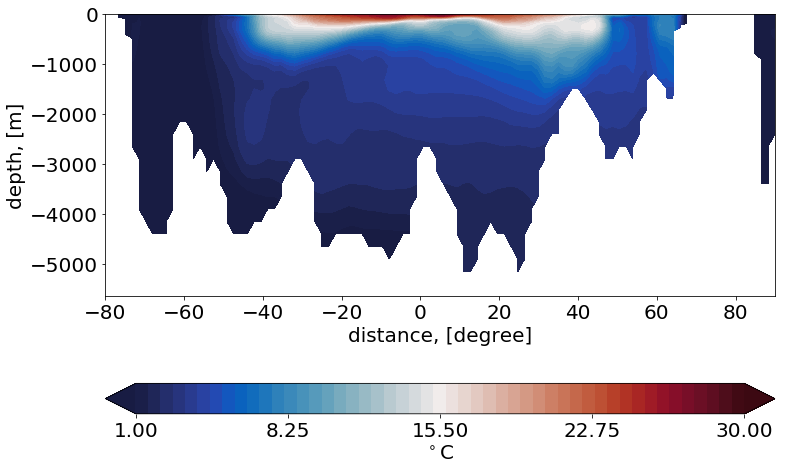

In [9]:
# set the paths to the results, runid, etc.
result_path ='/work/ollie/dsidoren/results/run_CORE2noGMSWHO_topo/'
runid ='fesom'
str_id='temp'

# specify records and year to read
records, year=np.linspace(0,0,1).astype(int), 1959

# set the label for the colorbar & contour intervals for ftriplot
cbartext, cont = '$^\circ$C', [1., 30., .1]

# define the section with points p1(x1,y1), p2(x2,y2)
p1=np.array([-30.,   -80.])
p2=np.array([-30.,    90.])

# set the number of descrete points in horizontal and vertical (nxy and nz, respectively) to represent the section
nxy=100
nz =46

# read thesection from the data
[sx, sy, sz]=read_fesom_sect(str_id, records, year, mesh, result_path, runid, p1, p2, nxy, nz, \
    how='mean', line_distance=5., radius_of_influence=300000)

# replace dummies with NaNs
sz[sz>1.e100]=np.nan

# plot the result
cmap=cmo.balance
fig = plt.figure(figsize=(12,8))
plt.contourf(sy, mesh.zlev[0:nz], sz, cmap=cmap, levels=np.linspace(cont[0], cont[1], 50), extend='both')
plt.xlabel('distance, [degree]', fontsize=fontsize)
plt.ylabel('depth, [m]', fontsize=fontsize)
cbar=plt.colorbar(orientation="horizontal", pad=.2)
cbar.set_ticks([round(i,4) for i in np.linspace(cont[0], cont[1], 5)])
cbar.set_label(cbartext, fontsize=fontsize)
cbar.set_label(cbartext, fontsize=fontsize)

## Example 5
### computing MOC from vertical velocity

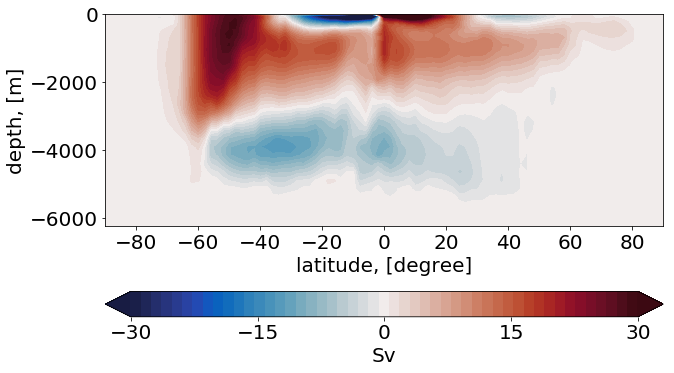

In [10]:
# set the paths to the results, runid, etc.
result_path ='/work/ollie/dsidoren/results/run_CORE2noGMSWHO_topo/'
runid ='fesom'

# set the label for the colorbar & contour intervals for ftriplot
cbartext, cont = 'Sv', [-30., 30., .5]

# define a descrete set of latitudes
nlats=91
lats=np.linspace(-90, 90, nlats)
dlat=lats[1]-lats[0]
# allocate moc array
moc=np.zeros([mesh.nlev, nlats])

# read the required metadata (mesh diagnostic file is always created at the cold start)
# grid information is needed for computing the MOC
ncfile  = Dataset(os.path.join(result_path, runid+'.mesh.diag.nc'))
el_area =ncfile.variables['elem_area'][:]
nlevels =ncfile.variables['nlevels'][:]-1
el_nodes=ncfile.variables['elem'][:,:]-1
nodes_x =ncfile.variables['nodes'][0,:]*180./np.pi
nodes_y =ncfile.variables['nodes'][1,:]*180./np.pi

# compute lon/lat coordinate of an element required lated for binning
elem_x  =nodes_x[el_nodes].sum(axis=0)/3.
elem_y  =nodes_y[el_nodes].sum(axis=0)/3.

# specify records and year to read
records, year=np.linspace(0,0,1).astype(int), 1959

# compute MOC
# precompute positions of elements for binning
pos = ((elem_y-lats[0])/dlat).astype('int')

# compute contributions from vertical velocities on elements and put them into bins
for i in range(mesh.nlev):
# read the model result from fesom.XXXX.oce.nc
    w=read_fesom_slice('w', records, year, mesh, result_path, runid, ilev=i)
#     print(i)
    # mean over elements
    elem_mean = np.sum(w[el_nodes[:,:]], axis=0)/3.*1.e-6
    # weigh by element area
    elem_mean_weigh = el_area*elem_mean
    # select nodes to consider in calculation based on number of levels
    toproc = np.where(i <=  nlevels-1)[0]
    # for every bin select elements that belong to the bin and sum them.
    for k in range(pos.min(), pos.max()+1):
#         if (i <= nlevels[e]-1):
            moc[i, k]=elem_mean_weigh[toproc][pos[toproc]==k].sum()

# the result from the previous step needs to be cumulatively summed 
moc = np.ma.cumsum(np.ma.masked_invalid(moc), axis=1)

# plot the result
cmap=cmo.balance
fig = plt.figure(figsize=(10,6))
plt.contourf(lats, mesh.zlev, moc, cmap=cmap, levels=np.linspace(cont[0], cont[1], 50), extend='both')
plt.xlabel('latitude, [degree]', fontsize=fontsize)
plt.ylabel('depth, [m]', fontsize=fontsize)
cbar=plt.colorbar(orientation="horizontal", pad=.2)
cbar.set_ticks([round(i,4) for i in np.linspace(cont[0], cont[1], 5)])
cbar.set_label(cbartext, fontsize=fontsize)
cbar.set_label(cbartext, fontsize=fontsize)    

## Auxuary things, manipulations with the topography
### closing the Gibraltar Strait by setting the depth there to 20m
### !mesh needs to be repartitioned afterwards!


In [ ]:
# find nodes around Gibraltar
ind=(mesh.x2 > -6.5) & (mesh.x2 < -3.5) & (mesh.y2 > 34.5) & (mesh.y2 < 37.5)
ind=[i for (i, val) in enumerate(ind) if (val)]

# read mesh topography from file (in case we do not trust already loaded mesh information data)
topofile='/work/ollie/dsidoren/input/fesom2.0/meshes/mesh_CORE2_final/aux3d.out'
with open(topofile) as f:
     nlev=int(next(f))
     zlev=np.array([next(f).rstrip() for x in range(nlev)]).astype(float)
     topo=np.array([next(f).rstrip() for x in range(mesh.n2d)]).astype(float)

# set depth around Gibraltar to 20m and save it into different mesh file
topo[ind]=topo[ind]=-20.

# create the new aux3d.out
topofile_new='/work/ollie/dsidoren/input/fesom2.0/meshes/mesh_CORE2_final/aux3d.out.new'
f = open(topofile_new, 'w')
f.write(str(nlev)+'\n')
for depth in zlev:
    f.write(str(depth)+'\n')   
for depth in topo:
    f.write(str(depth)+'\n')
f.close()

### increasing the amount of vertical levels to that from NEMO (74 levels)
### read the prepared on the mesh etopo5 topography
### skip the second and third level in order do improve CFL
### !mesh needs to be repartitioned afterwards!

In [ ]:
meshpath  ='/work/ollie/dsidoren/input/fesom2.0/meshes/mesh_CORE2_final/'
nf=Dataset(meshpath+'etopo.nc') # ETOPO5 topography already prepared
topo=nf.variables['topo'][:]
topo[topo >=     0]=-10.
topo[topo < -6500]=-6500.
# read the NEMO 74 vertical levels
nf=Dataset('/work/ollie/dsidoren/input/fesom2.0/NEMO_levels74.nc')
levels=-nf.variables['gdepw_0'][0,:]
# skip the very upper except for the first leveld in order to improve CFL
# add more depths
levels=np.concatenate((levels[[0, 4]], levels[5:], np.array([levels[-1]+levels[-1]-levels[-2], -6250])))
N=len(levels)

# create the new aux3d.out
topofile_new='/work/ollie/dsidoren/input/fesom2.0/meshes/mesh_CORE2_final/aux3d.out.etopo5N74'
f = open(topofile_new, 'w')
f.write(str(N)+'\n')
for depth in levels:
    f.write(str(depth)+'\n')   
for depth in topo:
    f.write(str(depth)+'\n')
f.close()

# MOC in density coordinate
## (the ldiag_dMOC option shall be .true. in gen_modules_diag.F90)

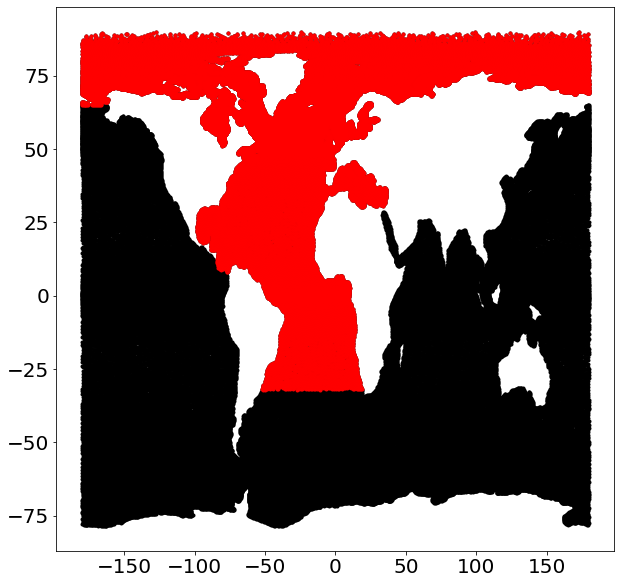

In [152]:
# set the path to the mesh
imeshpath   = result_path # shall point to where mesh.diag.nc is placed    
# read the required metadata (mesh diagnostic file is always created at the cold start)
# grid information is needed for computing the MOC
ncfile  = Dataset(os.path.join(imeshpath, 'fesom'+'.mesh.diag.nc'))
el_area =ncfile.variables['elem_area'][:]
nlevels =ncfile.variables['nlevels'][:]-1
el_nodes=ncfile.variables['elem'][:,:]-1
nodes_x =ncfile.variables['nodes'][0,:]*180./np.pi
nodes_y =ncfile.variables['nodes'][1,:]*180./np.pi
n3_area =ncfile.variables['nod_area'][:,:]
# compute lon/lat coordinate of an element required lated for binning
elem_x  =nodes_x[el_nodes].sum(axis=0)/3.
elem_y  =nodes_y[el_nodes].sum(axis=0)/3.
ncfile.close()
# these shall be the density bins which are specified in gen_modules_diag.F90
# lat us move it to some namelist later on
std_dens=[0.0000,   30.00000, 30.55556, 31.11111, 31.36000, 31.66667, 31.91000, 32.22222, 32.46000,
32.77778, 33.01000, 33.33333, 33.56000, 33.88889, 34.11000, 34.44444, 34.62000, 35.00000,
35.05000, 35.10622, 35.20319, 35.29239, 35.37498, 35.41300, 35.45187, 35.52380, 35.59136,
35.65506, 35.71531, 35.77247, 35.82685, 35.87869, 35.92823, 35.97566, 35.98000, 36.02115,
36.06487, 36.10692, 36.14746, 36.18656, 36.22434, 36.26089, 36.29626, 36.33056, 36.36383,
36.39613, 36.42753, 36.45806, 36.48778, 36.51674, 36.54495, 36.57246, 36.59500, 36.59932,
36.62555, 36.65117, 36.67621, 36.68000, 36.70071, 36.72467, 36.74813, 36.75200, 36.77111,
36.79363, 36.81570, 36.83733, 36.85857, 36.87500, 36.87940, 36.89985, 36.91993, 36.93965,
36.95904, 36.97808, 36.99682, 37.01524, 37.03336, 37.05119, 37.06874, 37.08602, 37.10303,
37.11979, 37.13630, 37.15257, 37.16861, 37.18441, 37.50000, 37.75000, 40.00000]

# GLOBAL mask
#mask=np.ones(mesh.n2d) # use mask=1 everywhere this if you wish to plot the global MOC
# NA mask
#let us plot the AMOC
ind1= (np.array(mesh.x2>-100) & np.array(mesh.x2<50)) | np.array(mesh.y2>65)
ind2=~(np.array(mesh.x2>-110) & np.array(mesh.x2<-70) & np.array(mesh.y2>-50) & np.array(mesh.y2<8))
ind3=~(np.array(mesh.x2>-80.41) & np.array(mesh.x2<-78) & np.array(mesh.y2>7) & np.array(mesh.y2<9.02))
ind4=~(np.array(mesh.x2>-110)  & np.array(mesh.x2<-81.5) & np.array(mesh.y2>7.9) & np.array(mesh.y2<8.6))
ind5=~(np.array(mesh.x2>-100.75)  & np.array(mesh.x2<-83.5) & np.array(mesh.y2>8.5) & np.array(mesh.y2<10))
ind6=~(np.array(mesh.x2>-110)  & np.array(mesh.x2<-85) & np.array(mesh.y2>9) & np.array(mesh.y2<15))
ind7=~(np.array(mesh.x2>-110)  & np.array(mesh.x2<-91) & np.array(mesh.y2>14.5) & np.array(mesh.y2<17))
ind8=~(np.array(mesh.x2>22.55)  & np.array(mesh.x2<55) & np.array(mesh.y2>-35) & np.array(mesh.y2<29.9))
ind9=~(np.array(mesh.x2>47)  & np.array(mesh.x2<51) & np.array(mesh.y2>29) & np.array(mesh.y2<31))
ind10=np.array(mesh.y2)>-32
ind=ind1&ind2&ind3&ind4&ind5&ind6&ind7&ind8&ind9&ind10
# CORE2 mesh patch
ind11=~(np.array(mesh.x2>-75)  & np.array(mesh.x2<-65) & np.array(mesh.y2>-25) & np.array(mesh.y2<-15))
ind12=~(np.array(mesh.x2>-100.5)  & np.array(mesh.x2<-99.5) & np.array(mesh.y2>16) & np.array(mesh.y2<17.5))
ind13=~(np.array(mesh.x2>-83.8)  & np.array(mesh.x2<-83.)  & np.array(mesh.y2>8.5) & np.array(mesh.y2<9.1))
ind14=~(np.array(mesh.x2>-81.5)  & np.array(mesh.x2<-80.)  & np.array(mesh.y2>8.0) & np.array(mesh.y2<8.5))
ind15=~(np.array(mesh.x2> 179.)  & np.array(mesh.x2<180.4) & np.array(mesh.y2>64.) & np.array(mesh.y2<65.5))
ind16= (np.array(mesh.x2>-80.4)  & np.array(mesh.x2<-80.)  & np.array(mesh.y2>8.8) & np.array(mesh.y2<9.1))
ind17=~(np.array(mesh.x2>-85.2)  & np.array(mesh.x2<-84.6) & np.array(mesh.y2>9.9) & np.array(mesh.y2<10.2))
ind=(ind&ind11&ind12&ind13&ind14&ind15&ind17)|(ind16)
plt.figure(figsize=(10,10))
plt.plot(mesh.x2, mesh.y2, '.k')
plt.plot(mesh.x2[ind], mesh.y2[ind], '.r') 
mask=np.copy(ind)

In [153]:
# allocate moc array
import shelve
import gc
ndens=len(std_dens)
nlats=90 # number of desred latitudinal bins
lats=np.linspace(-90, 90, nlats)
dlat=lats[1]-lats[0]
# all these fields shall be available if ldiag_dMOC=.TRUE. in namelist.io
# and io_list contains 'dAMOC'
moc_dens=np.zeros([ndens, nlats])
moc_heat=np.zeros([ndens, nlats])
moc_frwt=np.zeros([ndens, nlats])
moc_rest=np.zeros([ndens, nlats])
moc_tend=np.zeros([ndens, nlats])
moc_div =np.zeros([ndens, nlats])
moc_zpos=np.zeros([ndens, nlats])

wdiff=np.diff(std_dens)
w =np.zeros(len(std_dens))
w[0   ]= wdiff[0   ]/2.
w[-1  ]= wdiff[-1  ]/2.
w[1:-1]=(wdiff[0:-1]+wdiff[1:])/2.

# compute lon/lat coordinate of an element required lated for binning
elem_x  =nodes_x[el_nodes].sum(axis=0)/3.
elem_y  =nodes_y[el_nodes].sum(axis=0)/3.

# specify records and year to read
records, year=np.linspace(0,0,1).astype(int), 1966

# compute MOC
# precompute positions of elements for binning
pos = ((elem_y-lats[0])/dlat).astype('int')

# compute contributions from vertical velocities on elements and put them into bins
for i in range(len(std_dens)):
    heat_flux = read_fesom_slice('std_heat_flux', records, year, mesh, result_path, runid, ilev=i)
    frwt_flux = read_fesom_slice('std_frwt_flux', records, year, mesh, result_path, runid, ilev=i)
    rest_flux = read_fesom_slice('std_rest_flux', records, year, mesh, result_path, runid, ilev=i)
    dvol_dt   = read_fesom_slice('std_dens_dVdT', records, year, mesh, result_path, runid, ilev=i)
    div       = read_fesom_slice('std_dens_DIV',  records, year, mesh, result_path, runid, ilev=i)
    z         = read_fesom_slice('std_dens_Z',    records, year, mesh, result_path, runid, ilev=i)    
    heat_flux = heat_flux*mask[mesh.elem].mean(axis=1)*1.e-6/w[i]*1024.
    frwt_flux = frwt_flux*mask[mesh.elem].mean(axis=1)*1.e-6/w[i]*1024.
    rest_flux = rest_flux*mask[mesh.elem].mean(axis=1)*1.e-6/w[i]*1024.
    dvol_dt   = dvol_dt  *mask[mesh.elem].mean(axis=1)*1.e-6
    div       = div*1.e-6/mesh.lump2
    z         = z*mask[mesh.elem].mean(axis=1)
    # weigh by element area
    # elem_mean_weigh = el_area*elem_mean
    # for every bin select elements that belong to the bin and sum them.
    for k in range(pos.min(), pos.max()+1):
        moc_heat[i, k]=heat_flux[:][pos[:]==k].sum()
        moc_frwt[i, k]=frwt_flux[:][pos[:]==k].sum()
        moc_rest[i, k]=rest_flux[:][pos[:]==k].sum()
        moc_tend[i, k]=dvol_dt  [:][pos[:]==k].sum()
        aux           =(z*mesh.voltri)[:][pos[:]==k]
        weight        =mesh.voltri    [:][pos[:]==k]
        aux[aux>-.1]  =np.nan
        weight[np.isnan(aux)]=np.nan

        moc_zpos[i, k]  =np.nansum(aux)/np.nansum(weight)
        elem_mean_weigh =np.sum(div[el_nodes[:,:]], axis=0)/3.*mesh.voltri
        elem_mean_weigh =elem_mean_weigh*mask[mesh.elem].min(axis=1)
        moc_div[i, k]   =elem_mean_weigh[:][pos[:]==k].sum()
                   
# the result from the previous step needs to be cumulatively summed 
moc_heat = -np.ma.cumsum(np.ma.masked_invalid(moc_heat), axis=1)
moc_frwt = -np.ma.cumsum(np.ma.masked_invalid(moc_frwt), axis=1)
moc_rest = -np.ma.cumsum(np.ma.masked_invalid(moc_rest), axis=1)

arr=moc_heat[:,-1]
for i in range(moc_heat.shape[1]):
    moc_heat[:,i] = moc_heat[:,i]-arr

arr=moc_frwt[:,-1]
for i in range(moc_frwt.shape[1]):
    moc_frwt[:,i] = moc_frwt[:,i]-arr
    
arr=moc_rest[:,-1]
for i in range(moc_rest.shape[1]):
    moc_rest[:,i] = moc_rest[:,i]-arr
       
moc_full=np.ma.cumsum(np.cumsum(moc_div[::-1,:], axis=0)[::-1,:],1)
arr=moc_full[:,-1]
for i in range(moc_full.shape[1]):
    moc_full[:,i] = moc_full[:,i]-arr
    
moc_drift=np.ma.cumsum(np.cumsum(moc_tend[::-1,:], axis=0)[::-1,:],1)
arr=moc_drift[:,-1]
for i in range(moc_drift.shape[1]):
    moc_drift[:,i] = moc_drift[:,i]-arr

/home/ollie/dsidoren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars


In [154]:
# densities at which wi want to plot (visualisation issue)
from scipy.interpolate import interp1d
aux=np.copy(moc_zpos)
aux[aux==0]=np.nan
remap=np.nanmean(aux, axis=1)
remap[0] =0.1
remap[1] =0.
remap[-1]=-5000.
for i in range(len(remap)-1):
    if (remap[i+1]>=remap[i]):
        remap[i+1]=remap[i]-1.

# dens2reg, reg2dens will be the interpolators of the standart dencities to the remapped ones and vi(for the visualisation purpose)
z2dens = interp1d(remap[1:], std_dens[1:], kind='linear')
remap=np.array([0., 28.10, 28.90, 29.70,30.50, 30.95, 31.50, 32.05, 32.60, 33.15, 33.70, 34.25, 34.75, 35.15, 35.50, 35.80, 36.04, 36.20, 36.38, 36.52, 36.62, 36.70, 36.77, 36.83, 36.89, 36.97, 37.02, 37.06, 37.09, 37.11, 37.13, 37.15, 37.20, 37.30, 37.40, 40.])        
reg  =np.linspace(0, len(remap), len(remap))
dens2reg = interp1d(remap, reg, kind='linear')
reg2dens = interp1d(reg, remap, kind='linear')

(-20, 90)

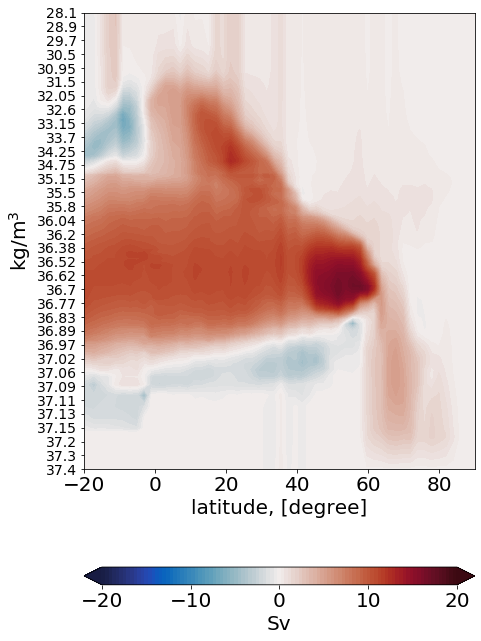

In [165]:
# plot the result
# you may wish to look at:
# moc_full,
# moc_heat+moc_frwt+moc_rest (surface forced transformations)
# or moc_drift
cbartext, cont = 'Sv', [-20., 20., .1]
cmap=cmo.balance
fig = plt.figure(figsize=(7,12))
ax = plt.subplot(1, 1, 1)
# moc_drift, moc_full, moc_heat, moc_frwt, moc_rest
plt.contourf(lats, dens2reg(std_dens), moc_full, cmap=cmo.balance, levels=np.linspace(cont[0], cont[1], 100), extend='both')
#plt.contourf(lats, std_dens, moc_full, cmap=cmo.balance, levels=np.linspace(cont[0], cont[1], 100), extend='both')
plt.gca().invert_yaxis()
ax.set_yticks(reg[1:-1])
ax.set_yticklabels(np.around(reg2dens(reg[1:-1]), 3), size = 14)

plt.xlabel('latitude, [degree]', fontsize=fontsize)
plt.ylabel('kg/m$^3$', fontsize=fontsize)
cbar=plt.colorbar(orientation="horizontal")
cbar.set_ticks([round(i,4) for i in np.linspace(cont[0], cont[1], 5)])
cbar.set_label(cbartext, fontsize=fontsize)
cbar.set_label(cbartext, fontsize=fontsize)
plt.xlim(-20,90)

In [19]:
# an alternative way to compute MOC via the meridional transports
# can also be used to compute transports across sections (ACC etc).
from ut import *
result_path ='/work/ollie/dsidoren/test/'
runid    ='fesom'
year=1949

ncfile   =Dataset(os.path.join(result_path, runid+'.mesh.diag.nc'))
edges    =ncfile.variables['edges'][:]-1
el_nodes =ncfile.variables['elem'][:,:]-1
edge_dxdy=ncfile.variables['edge_cross_dxdy'][:]
edge_tri =ncfile.variables['edge_tri'][:]-1
nlevels  =ncfile.variables['nlevels'][:]-1
zbar     =ncfile.variables['zbar'][:]
ncfile.close()
std_densN=len(std_dens)

# define a descrete set of latitudes
nlats=300
lats=np.linspace(-90, 90, nlats)
# allocate moc array
moc   =np.zeros([std_densN, nlats])
drhodz=np.zeros([std_densN, nlats])


edge_dxdy_l=np.array([ edge_dxdy[1,:], -edge_dxdy[0,:]])
edge_dxdy_r=np.array([-edge_dxdy[3,:],  edge_dxdy[2,:]])
edge_dxdy_r[:, edge_tri[1,:]<0]=0.

u   =0.
v   =0.
rhoz=0.
ncfile = Dataset(os.path.join(result_path, 'U_rho_x_DZ.fesom.'+str(year)+'.nc'))
u      = u+ncfile.variables['U_rho_x_DZ'][:].mean(axis=0)
ncfile.close()

ncfile = Dataset(os.path.join(result_path, 'V_rho_x_DZ.fesom.'+str(year)+'.nc'))
v      = v+ncfile.variables['V_rho_x_DZ'][:].mean(axis=0)
ncfile.close()

#zonally averaged dRHO/dZ is used for diagnosing numerical mixing from dMOC
ncfile = Dataset(os.path.join(result_path, 'RHO_Z.fesom.'+str(year)+'.nc'))
rhoz   = rhoz+ncfile.variables['RHO_Z'][:].mean(axis=0)
ncfile.close()
    
#for i in range(u.shape[1]):
#    u[nlevels==i,i:]=0.
#    v[nlevels==i,i:]=0.
x_el=(mesh.x2[el_nodes].mean(axis=0))
y_el=(mesh.x2[el_nodes].mean(axis=0))
for I,Y in enumerate(lats):
    ind=((mesh.y2[edges[0,:]]-Y)*(mesh.y2[edges[1,:]]-Y) < 0.)
    ind2=(mesh.y2[edges[0,:]] <= Y)
    edge_dxdy_l[:, ind2]=-edge_dxdy_l[:, ind2]
    edge_dxdy_r[:, ind2]=-edge_dxdy_r[:, ind2]
    
    res1=(edge_dxdy_l[0,ind]*u[edge_tri[0,ind],:].T).sum(axis=1)
    res2=(edge_dxdy_l[1,ind]*v[edge_tri[0,ind],:].T).sum(axis=1)
    res3=(edge_dxdy_r[0,ind]*u[edge_tri[1,ind],:].T).sum(axis=1)
    res4=(edge_dxdy_r[1,ind]*v[edge_tri[1,ind],:].T).sum(axis=1)
    
    [vec_x, vec_y]=vec_rotate_r2g(alpha, beta, gamma, x_el[edge_tri[0,ind]], y_el[edge_tri[0,ind]], edge_dxdy_l[0,ind], edge_dxdy_l[1,ind], 1)    
#    vec_x=edge_dxdy_l[0,ind]
    res5=(np.abs(vec_x)*rhoz[edge_tri[0,ind],:].T).sum(axis=1)
    [vec_x, vec_y]=vec_rotate_r2g(alpha, beta, gamma, x_el[edge_tri[1,ind]], y_el[edge_tri[1,ind]], edge_dxdy_r[0,ind], edge_dxdy_r[1,ind], 1)    
#   vec_x=edge_dxdy_r[0,ind]
    res6=(np.abs(vec_x)*rhoz[edge_tri[1,ind],:].T).sum(axis=1)
    
    moc[:,I]   =-np.cumsum((res1+res2+res3+res4))*1.e-6
    drhodz[:,I]= res5+res6
    
    edge_dxdy_l[:, ind2]=-edge_dxdy_l[:, ind2]
    edge_dxdy_r[:, ind2]=-edge_dxdy_r[:, ind2]

moc[-1,:]   =0.
drhodz[-1,:]=0.

## plot the dMOC

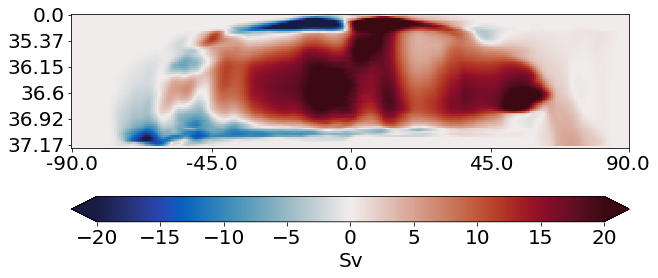

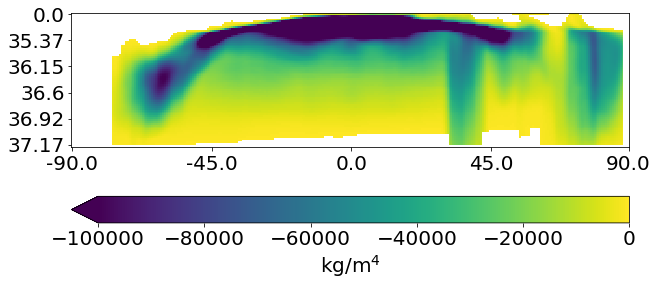

In [20]:
import matplotlib.cm as cm
fig = plt.figure(figsize=(10,6))
cbartext, cont = 'Sv', [-20., 20.]
#moc[moc==0.]=np.nan
flt=np.array([0.125, 0.25, 0.25, 0.25, 0.125])
moc_conv=np.apply_along_axis(lambda m: np.convolve(m, flt, mode='same'), axis=1, arr=moc)
# we plot density MOC as an image in order to accout for stretching along the Y axis
plt.imshow(moc_conv[:,:], vmin=cont[0], vmax=cont[1], cmap=cmo.balance)

# a dirty trick about labels along the X axis
axis=lats
dx=int(len(axis)/4.)
ind=np.arange(0, len(axis)+1, dx)
ind[-1]=ind[-1]-1
labels=[-90., -45., 0., 45., 90.]
plt.xticks(ind, labels)
axis=std_dens
ind=np.arange(0, len(axis), int(len(axis)/5.))
plt.yticks(ind, np.round(axis[ind], 2))
cbar=plt.colorbar(orientation='horizontal', extend='both')
cbar.set_label('Sv', fontsize=fontsize)

# same for dRHO/dZ
fig = plt.figure(figsize=(10,6))
cbartext, cont = 'Sv', [-100000., 0.]
drhodz[abs(drhodz)<100.]=np.nan
flt=np.array([0.125, 0.25, 0.25, 0.25, 0.125])
drhodz_conv=np.apply_along_axis(lambda m: np.convolve(m, flt, mode='same'), axis=1, arr=drhodz)
# we plot density MOC as an image in order to accout for stretching along the Y axis
plt.imshow(drhodz_conv, vmin=cont[0], vmax=cont[1], cmap=cm.viridis)

# a dirty trick about labels along the X axis
axis=lats
dx=int(len(axis)/4.)
ind=np.arange(0, len(axis)+1, dx)
ind[-1]=ind[-1]-1
labels=[-90., -45., 0., 45., 90.]
plt.xticks(ind, labels)
axis=std_dens
ind=np.arange(0, len(axis), int(len(axis)/5.))
plt.yticks(ind, np.round(axis[ind], 2))
cbar=plt.colorbar(orientation='horizontal', extend='min')#, format='%.0e')
cbar.set_label('kg/m$^4$', fontsize=fontsize)

## diagnosing the numerical dyapicnal mixing after A. Megann 2018

/home/ollie/dsidoren/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,0,'latitude, [degree]')

<Figure size 720x432 with 0 Axes>

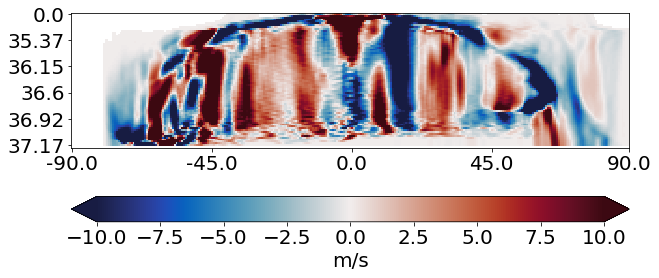

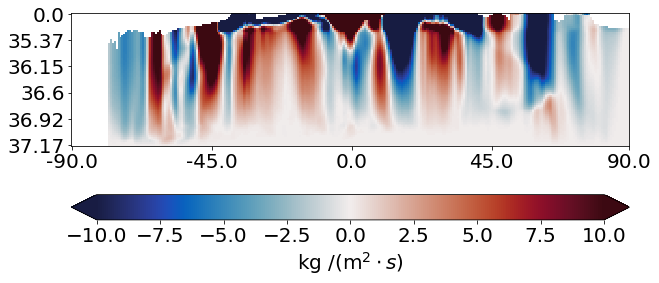

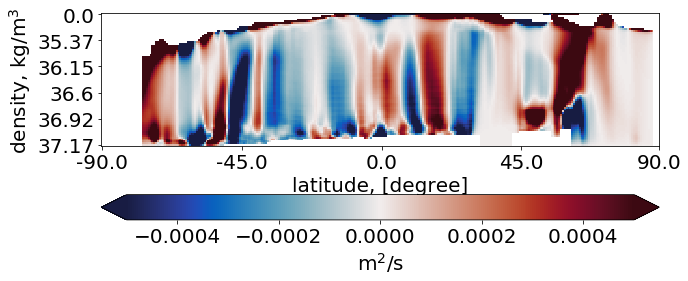

In [21]:
from matplotlib.colors import LogNorm
cmap=cmo.balance
fig = plt.figure(figsize=(10,6))
dlat=lats[1:]-lats[:-1]
dlat=dlat*np.pi/180.*6367500.
drho=std_dens[1:]-std_dens[:-1]
psi_y    =np.diff(moc, axis=1)/dlat*1.e6
psi_y_conv=np.apply_along_axis(lambda m: np.convolve(m, flt, mode='same'), axis=1, arr=psi_y)

rho_z=((drhodz[:,1:]+drhodz[:,:-1])/2.)[:-1]
rho_z[abs(rho_z)<10.]=np.nan
rho_z_conv=np.apply_along_axis(lambda m: np.convolve(m, flt, mode='same'), axis=1, arr=rho_z)
aux=(psi_y_conv[:-1,:]+psi_y_conv[1:,:])/2.
int_psi_y=np.flipud(np.flipud((aux.T*drho).T).cumsum(axis=0))

#diapycnal mixing
k_eff=int_psi_y/rho_z_conv

mlats=(lats[1:]+lats[:-1])/2.
nan_ind=(psi_y_conv==0)
psi_y_conv[nan_ind]=np.nan

nan_ind=(moc[:-1,:-1]==0)
int_psi_y[nan_ind]=np.nan

k_eff[nan_ind]=np.nan
# dPSI/dY
cbartext, cont = 'm$^2$/s', [-10., 10.]
fig = plt.figure(figsize=(10,6))
plt.imshow(psi_y_conv[:,:], vmin=cont[0], vmax=cont[1], cmap=cmo.balance)
axis=lats
dx=int(len(axis)/4.)
ind=np.arange(0, len(axis)+1, dx)
ind[-1]=ind[-1]-1
labels=[-90., -45., 0., 45., 90.]
plt.xticks(ind, labels)
axis=std_dens[:-1]
ind=np.arange(0, len(axis), int(len(axis)/5.))
plt.yticks(ind, np.round(axis[ind], 2))
cbar=plt.colorbar(orientation='horizontal', extend='both')
cbar.set_label('m/s', fontsize=fontsize)

# integral from bottom to Z of dPSI/dY
cbartext, cont = 'm$^2$/s', [-10., 10.]
fig = plt.figure(figsize=(10,6))
plt.imshow(int_psi_y[:,:], vmin=cont[0], vmax=cont[1], cmap=cmo.balance)
axis=lats
dx=int(len(axis)/4.)
ind=np.arange(0, len(axis)+1, dx)
ind[-1]=ind[-1]-1
labels=[-90., -45., 0., 45., 90.]
plt.xticks(ind, labels)
axis=std_dens[:-1]
ind=np.arange(0, len(axis), int(len(axis)/5.))
plt.yticks(ind, np.round(axis[ind], 2))
cbar=plt.colorbar(orientation='horizontal', extend='both')
cbar.set_label('kg /(m$^2 \cdot s$)', fontsize=fontsize)

# diapycnal mixing : int_psi_y/rho_z_conv
cbartext, cont = 'm$^2$/s', [-5.e-4, 5.e-4]
fig = plt.figure(figsize=(10,6))
plt.imshow(k_eff[:,:], vmin=cont[0], vmax=cont[1], cmap=cmo.balance)
axis=lats
dx=int(len(axis)/4.)
ind=np.arange(0, len(axis)+1, dx)
ind[-1]=ind[-1]-1
labels=[-90., -45., 0., 45., 90.]
plt.xticks(ind, labels)
axis=std_dens[:-1]
ind=np.arange(0, len(axis), int(len(axis)/5.))
plt.yticks(ind, np.round(axis[ind], 2))
cbar=plt.colorbar(orientation='horizontal', extend='both')
cbar.set_label('m$^2$/s', fontsize=fontsize)
plt.ylabel('density, kg/m$^3$', fontsize=fontsize)
plt.xlabel('latitude, [degree]', fontsize=fontsize)